<a href="https://colab.research.google.com/github/Renanvictordiascosta/Atividade-Avaliativa-CNA/blob/main/BiD_casoespecial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

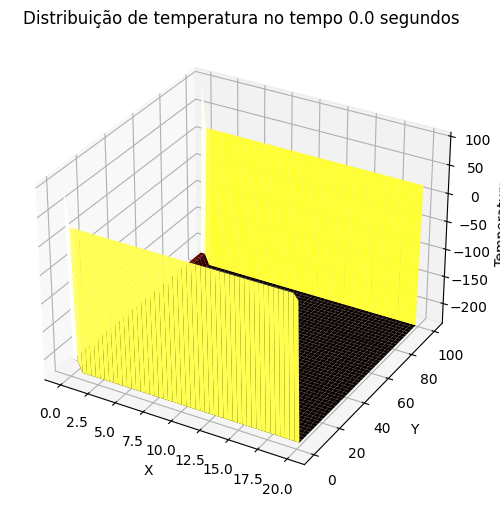

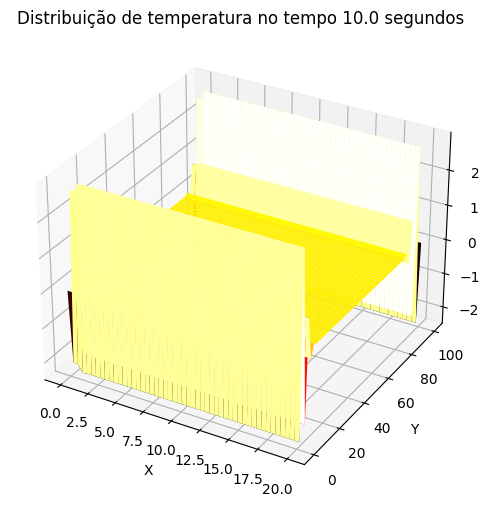

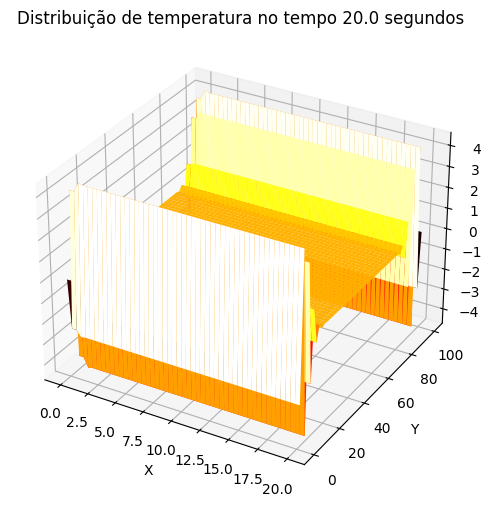

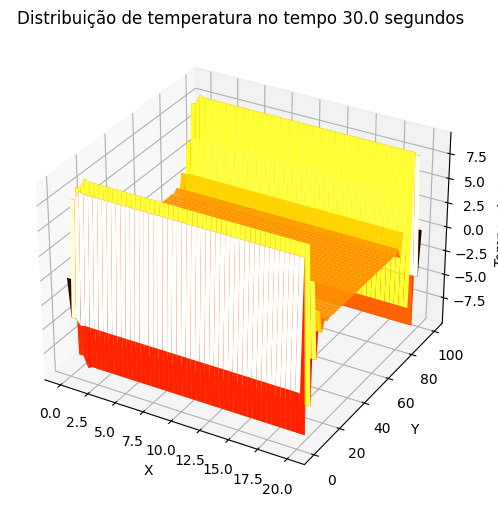

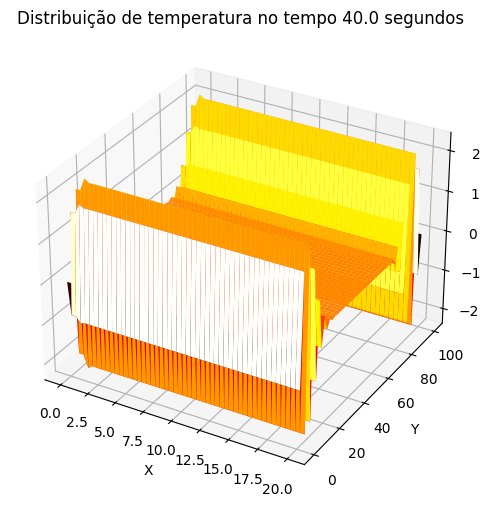

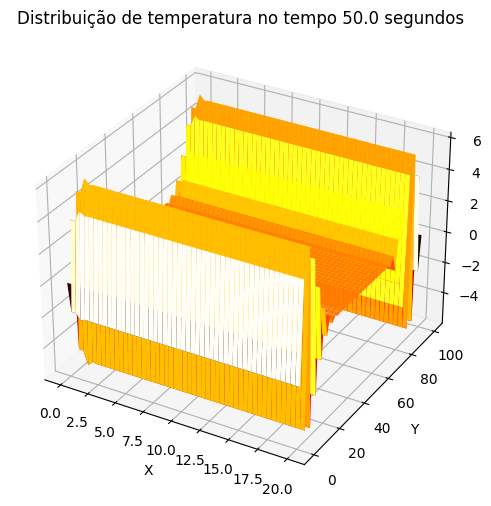

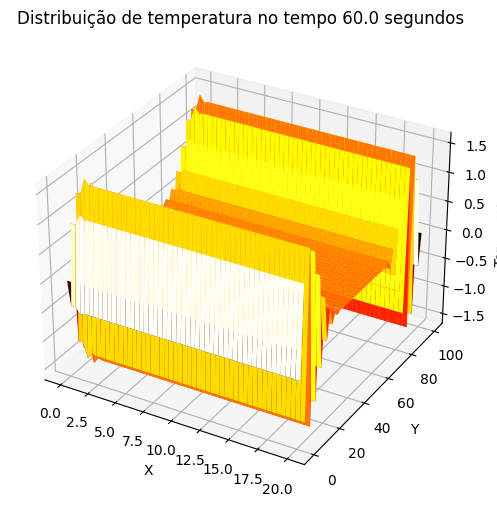

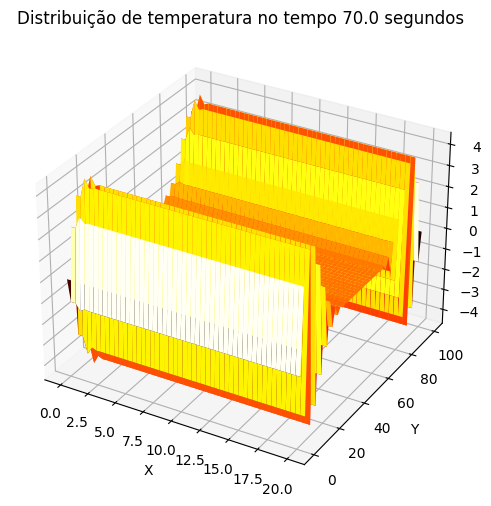

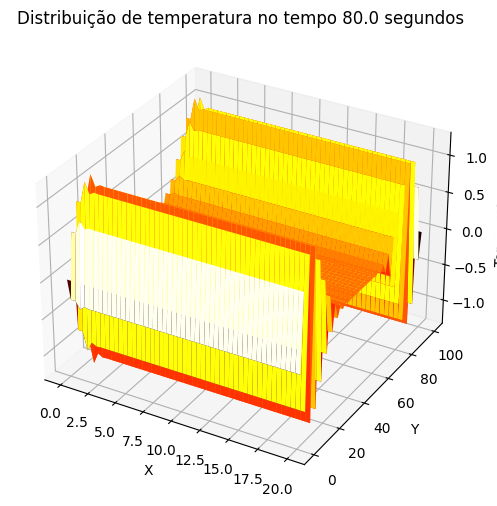

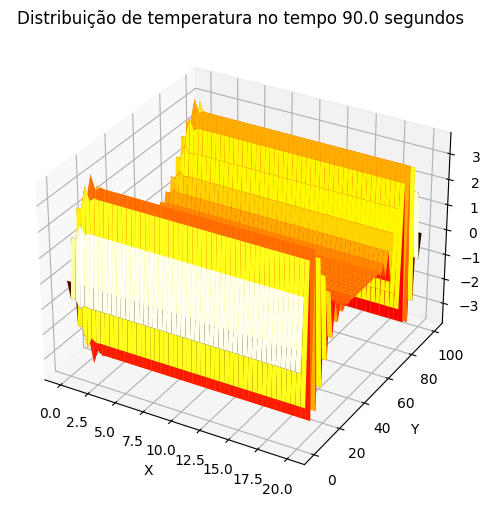

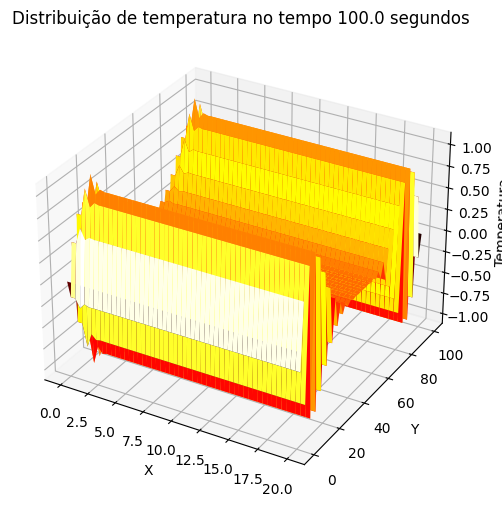

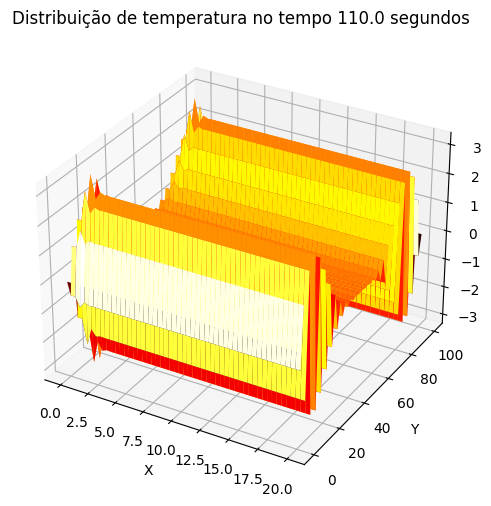

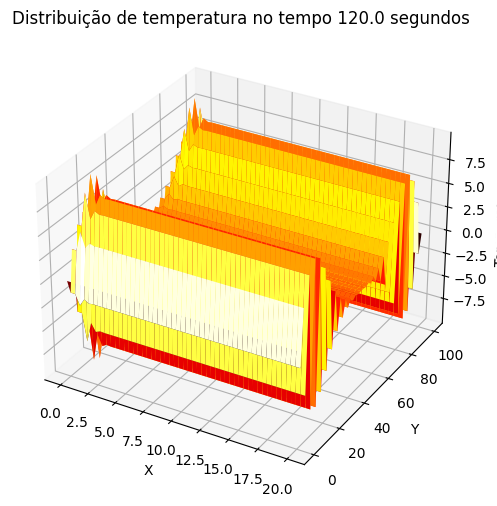

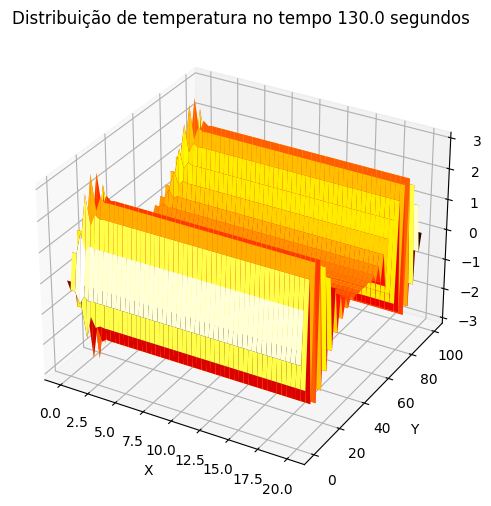

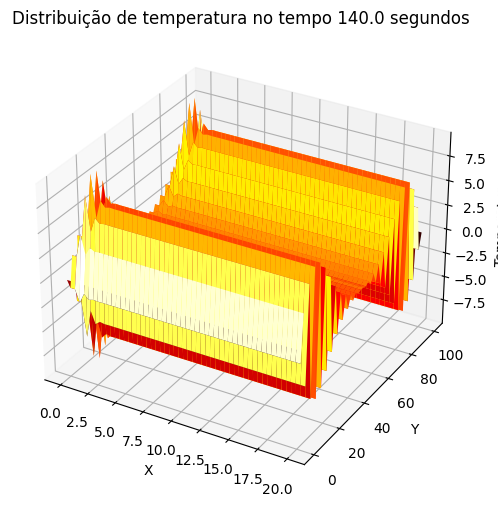

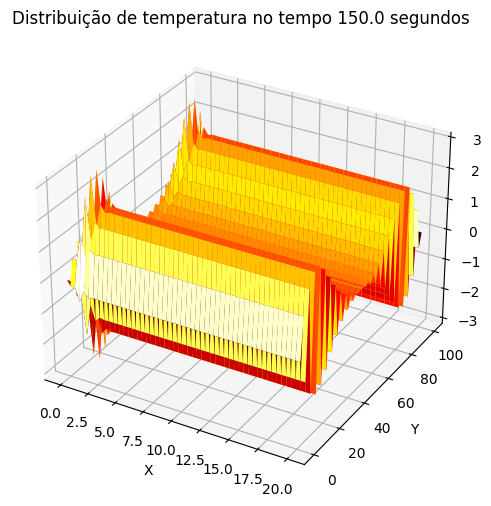

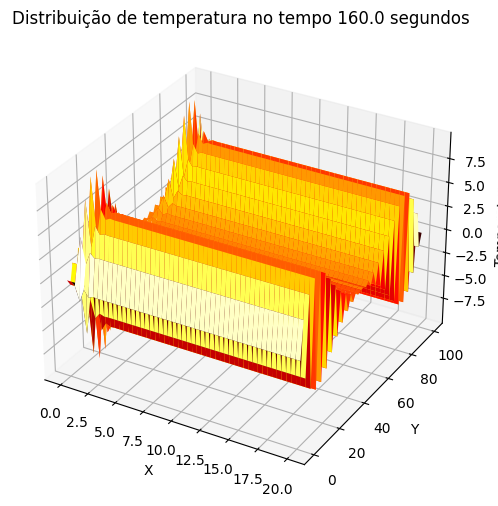

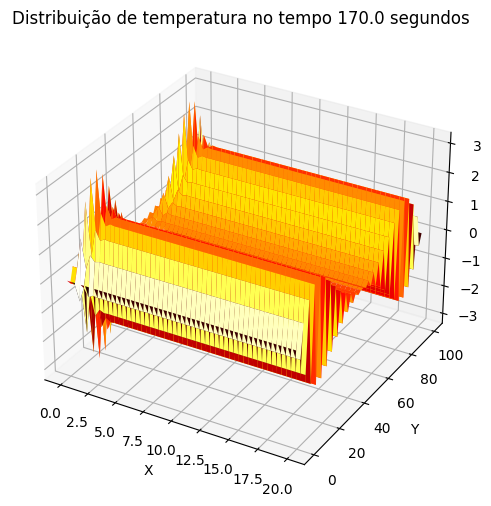

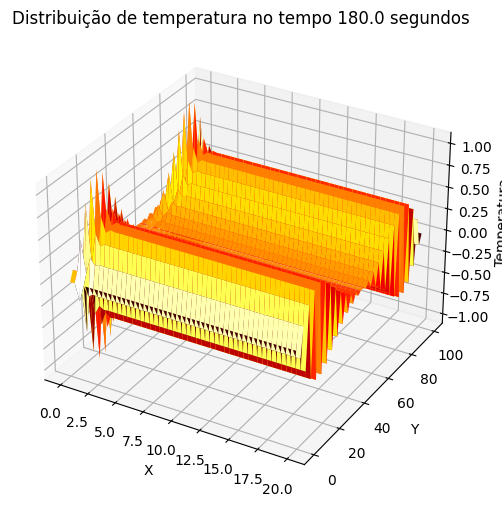

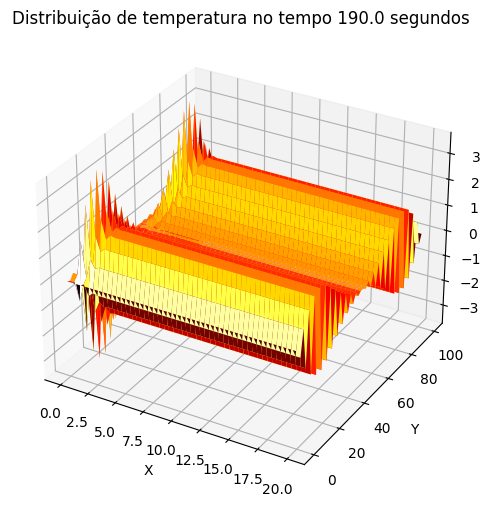

In [15]:
import numpy as np
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
import time

# Função de atualização da temperatura com o decorrer do tempo
def update_temperature(T, alpha, dt, dx, dy, hx, hy, q, Ta, h, Tamb):
    Tn = T.copy()
    Tn[1:-1, 1:-1] = (1 - 4 * alpha * dt / (dx ** 2) - 4 * alpha * dt / (dy ** 2)) * T[1:-1, 1:-1] + \
                     alpha * dt / (dx ** 2) * (T[2:, 1:-1] + T[:-2, 1:-1]) + \
                     alpha * dt / (dy ** 2) * (T[1:-1, 2:] + T[1:-1, :-2]) + \
                     dt * q

    # Condições de contorno
    Tn[0, 1:-1] = Ta + hx * dx / k
    Tn[-1, 1:-1] = Tamb
    Tn[1:-1, 0] = Tn[1:-1, 1]
    Tn[1:-1, -1] = Tn[1:-1, -2]

    return Tn

# Parâmetros
Lx = 20.0
Ly = 100.0
Nx = 50
Ny = 50
T_amb = 20.0
T_electrode = 100.0
h_conv = 25.0
k = 1.0
q = 0.0

# Grade
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Condição inicial
T = np.ones((Nx, Ny)) * T_amb
T[:, 0] = T_electrode

# Parâmetros de tempo
t_end = 191
dt = 1.0
alpha = k * dt

# Parâmetros espaciais
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

# Condição de conexão de borda
hx = h_conv
hy = h_conv
Ta = T_amb

t_x = 0

# Demonstração do avanço da distribuição de temperatura, no período de 0 a 190 segundos
for t in range(int(t_end / dt)):
    T = update_temperature(T, alpha, dt, dx, dy, hx, hy, q, Ta, h_conv, T_amb)
    if t_x <= t:
      t_x += 10
      fig = plot.figure(figsize=(10, 6))
      ax = fig.add_subplot(111, projection='3d')
      ax.plot_surface(X, Y, T, cmap='hot', edgecolor='none')
      ax.set_title(f'Distribuição de temperatura no tempo {t * dt} segundos')
      ax.set_xlabel('X')
      ax.set_ylabel('Y')
      ax.set_zlabel('Temperatura')
      plot.show()

    elif t_x  > (t_end):
      break;


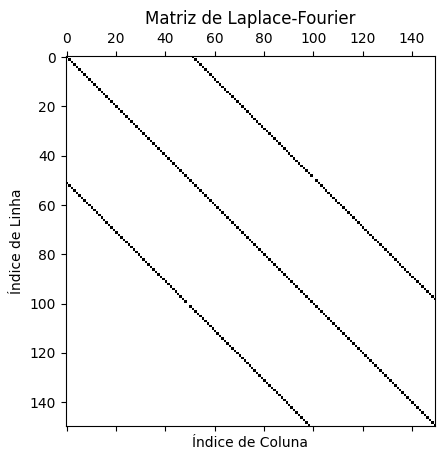

In [16]:
import numpy as np
import matplotlib.pyplot as plot

# Função de cálculo dos componentes da matriz de Laplace-Fourier
def DDMLaplaceFourier(Nx, Ny, hx, hy, alpha, dt, k):
    # Blocos diagonais
    D = np.eye(Ny) * (1 + 4 * alpha * dt / (hx ** 2) + 4 * alpha * dt / (hy ** 2))

    # Blocos de fora da diagonal
    E = np.eye(Ny, k=1) * (- alpha * dt / (hx ** 2))
    F = np.eye(Ny, k=-1) * (- alpha * dt / (hx ** 2))

    # Definição da matriz A com base nos blocos
    A = np.block([[D, E, np.zeros_like(E)],
                  [F, D, E],
                  [np.zeros_like(E), F, D]])

    return A

# Plotar a matriz de Laplace-Fourier
A = DDMLaplaceFourier(Nx, Ny, hx, hy, alpha, dt, k)
plot.figure()
plot.spy(A)
plot.title('Matriz de Laplace-Fourier')
plot.xlabel('Índice de Coluna')
plot.ylabel('Índice de Linha')
plot.show()

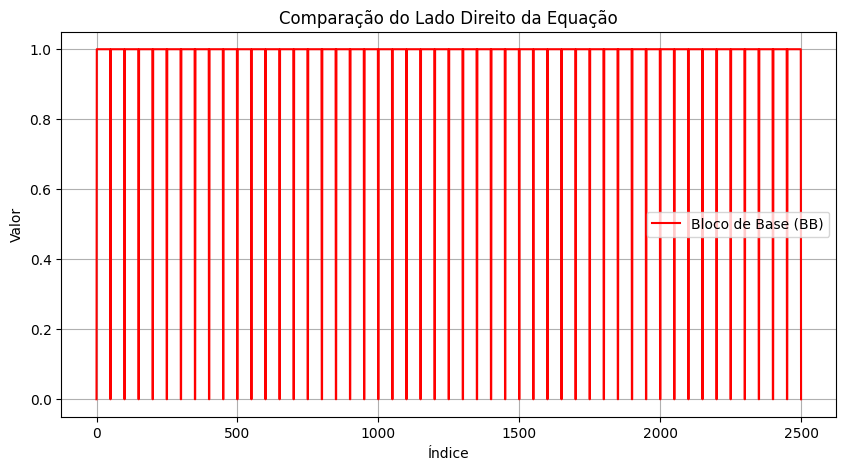

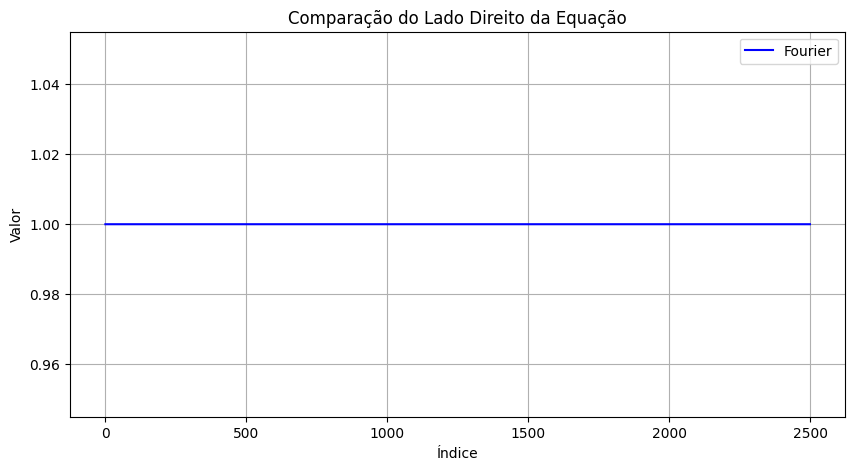

In [20]:
import numpy as np
import matplotlib.pyplot as plot

# Função do lado da mão direita pela regra de Fourier
def DDM_RightHandSide2dFourier(q, Nx, Ny, hx, hy):
    RHS = np.ones((Nx * Ny,))
    RHS[Ny-1::Ny] += q * hx * hy / 2  # Adiciona o calor gerado uniformemente à direita
    return RHS

def DDM_f1BB(x):
    return np.sin(x)

def DDM_g1BB(x):
    return np.sin(x)

# Função do lado da mâo direita pela regra do Bloco de Base
def DDM_rhs2dBB(Nx, Ny, hx, hy, q):
    RHS = np.ones((Nx * Ny,))
    for i in range(Nx):
        x = i * hx
        RHS[i*Ny] = DDM_f1BB(x) * hy * q / 2
        RHS[i*Ny + Ny - 1] = DDM_g1BB(x) * hy * q / 2
    return RHS

# Calcula o lado direito da equação usando Fourier
RHS_Fourier = DDM_RightHandSide2dFourier(q, Nx, Ny, hx, hy)

# Calcula o lado direito da equação usando as condições de contorno de Bloco de Base (BB)
RHS_BB = DDM_rhs2dBB(Nx, Ny, hx, hy, q)

# Plotar os resultados em Bloco de Base
plot.figure(figsize=(10, 5))
plot.plot(RHS_BB, label='Bloco de Base (BB)', color="red")
plot.title('Comparação do Lado Direito da Equação')
plot.xlabel('Índice')
plot.ylabel('Valor')
plot.legend()
plot.grid(True)
plot.show()

# Plotar os resultados em Fourier
plot.figure(figsize=(10, 5))
plot.plot(RHS_Fourier, label='Fourier', color="blue")
plot.title('Comparação do Lado Direito da Equação')
plot.xlabel('Índice')
plot.ylabel('Valor')
plot.legend()
plot.grid(True)
plot.show()